In [12]:
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime

import pandas as pd
import numpy as np

from simplekml import Kml, Color, Style

In [46]:
X     = [230,360]
Y     = [-80,-40]
d     = [5,2.5]
DF = pd.DataFrame({'Name':['WP1','WP2'],\
                   'Lat':np.random.uniform(low=Y[0], high=Y[1],size=2),\
                   'Long':np.random.uniform(low=X[0], high=X[1],size=2)})
OptInfo = {}
OptInfo['Start Time']           = '2017-03-15'
OptInfo['End Time']             = '2017-03-16'
OptInfo['WayPoints']            = DF
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = False
OptInfo['VariableSpeed']        = True
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None#['Palmer']

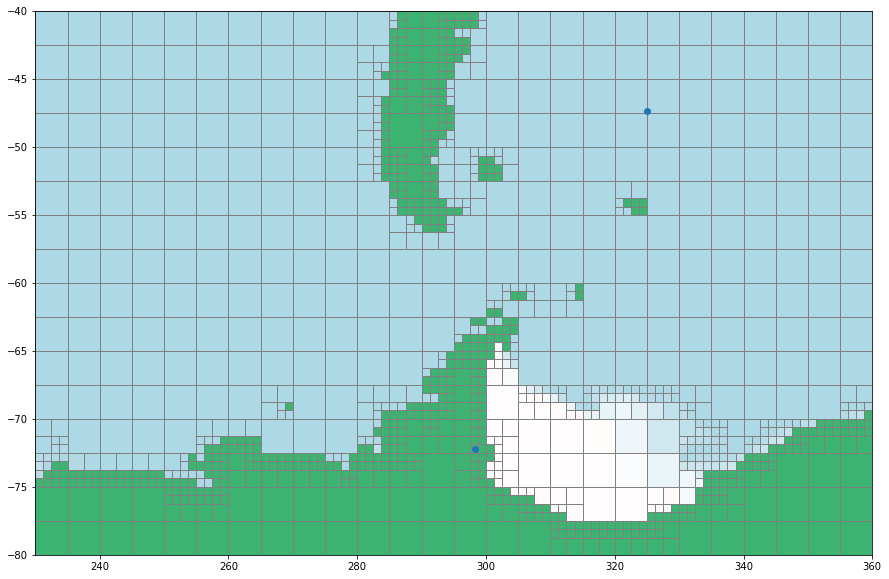

In [47]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(2)
ax = cellGrid.plot(return_ax=True)
ax.scatter(DF['Long'],DF['Lat'])

In [38]:
TT = TravelTime(cellGrid,OptInfo)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = WP1 ===
=== Processing Waypoint = WP2 ===


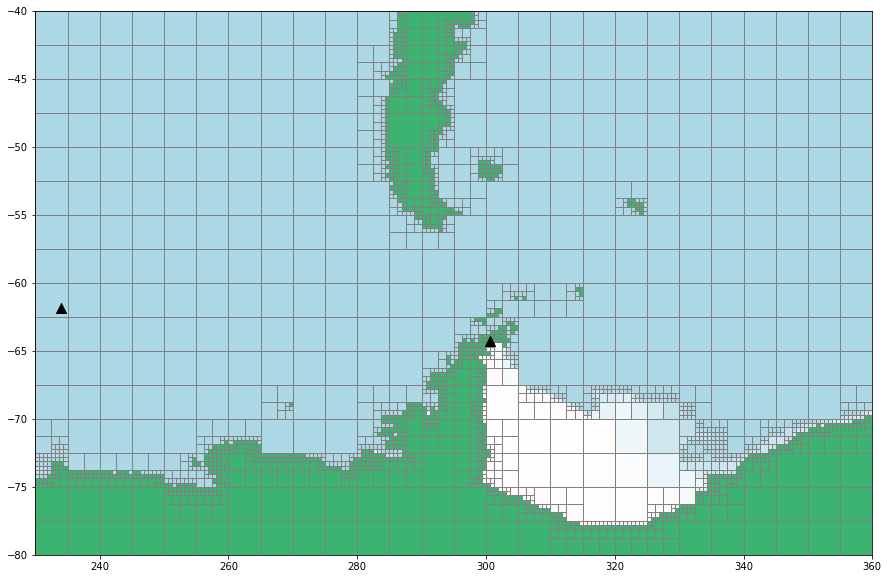

In [39]:
ax = TT.PlotPaths(TT.Paths,routepoints=True)


In [40]:
TT.PathSmoothing(maxiter=50)

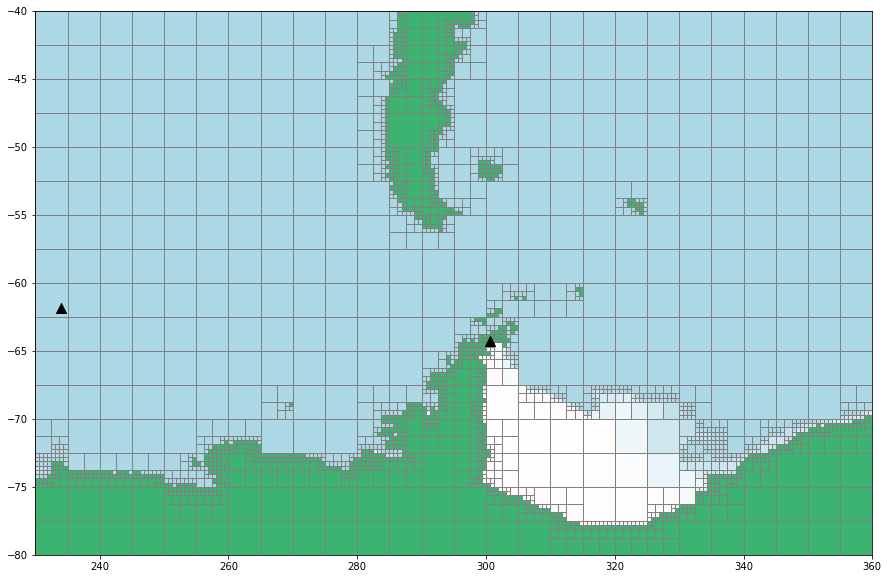

In [41]:
ax = TT.PlotPaths(TT.SmoothedPaths,routepoints=True)

In [36]:
# ax = TT.PlotPaths(TT.SmoothedPaths)
# Sp=(320.0,-54.16697826844944);Cp=(322.5,-53.125);Np=(0.0,0.0)
# Box1=(-53.64598913422472,321.25);Box2=(-26.5625,161.25)

# ax.scatter(Sp[0],Sp[1],15,'r')
# ax.scatter(Cp[0],Cp[1],15,'r')
# ax.scatter(Np[0],Np[1],15,'r')

# ax.scatter(Box1[1],Box1[0],50,'k')
# ax.scatter(Box2[1],Box2[0],50,'k')